In [3]:
import os
import pandas as pd
import scanpy
import numpy as np
import scipy
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

## Preprocessing

### Prepare

In [61]:
clonotypes_dir = 'GSE185381_TCR/clonotypes/filtered_clonotypes/'
os.listdir(clonotypes_dir)

['GSM5613820_2021-04-29-2910_cDNA_vdj_t_filtered_contig_annotations.csv',
 'GSM5613813_2020-08-07-MDS-AML_cDNA2_vdj_t_filtered_contig_annotations.csv',
 'GSM5613809_2020-03-18-82_vdj_t_filtered_contig_annotations.csv',
 'GSM5613822_2021-04-29-3948_cDNA_vdj_t_filtered_contig_annotations.csv',
 'GSM5613810_2020-05-22-5prime_1_vdj_t_filtered_contig_annotations.csv',
 'GSM5613817_2021-04-29-0134_cDNA_vdj_t_filtered_contig_annotations.csv',
 'GSM5613811_2020-05-22-5prime_2_vdj_t_filtered_contig_annotations.csv',
 'GSM5613808_2020-03-18-52-Dx_vdj_t_filtered_contig_annotations.csv',
 'GSM5613821_2021-04-29-2975_cDNA_vdj_t_filtered_contig_annotations.csv',
 'GSM5613816_2021-04-29-0102_cDNA_vdj_t_filtered_contig_annotations.csv',
 'GSM5613814_2020-10-06-5prime_cDNA3-AML051_vdj_t_filtered_contig_annotations.csv',
 'GSM5613818_2021-04-29-0693_cDNA_vdj_t_filtered_contig_annotations.csv',
 'GSM5613812_2020-08-07-MDS-AML_cDNA1_vdj_t_filtered_contig_annotations.csv',
 'GSM5613807_2019-10-21-1-Control

In [62]:
clonotype_prefixes = tuple([
    'GSM5613807_2019-10-21-1-Control0004',
    'GSM5613808_2020-03-18-52-Dx',
    'GSM5613809_2020-03-18-82',
    'GSM5613810_2020-05-22-5prime_1',
    'GSM5613811_2020-05-22-5prime_2',
    'GSM5613812_2020-08-07-MDS-AML_cDNA1',
    'GSM5613813_2020-08-07-MDS-AML_cDNA2',
    'GSM5613814_2020-10-06-5prime_cDNA3-AML051',
    'GSM5613815_2020-10-06-5prime_cDNA5',
    'GSM5613816_2021-04-29-0102_cDNA',
    'GSM5613817_2021-04-29-0134_cDNA',
    'GSM5613818_2021-04-29-0693_cDNA',
    'GSM5613819_2021-04-29-1133_cDNA',
    'GSM5613820_2021-04-29-2910_cDNA',
    'GSM5613821_2021-04-29-2975_cDNA',
    'GSM5613822_2021-04-29-3948_cDNA',
])


expression_prefixes = tuple([
    'X2019.10.21.1.Control0004',
    'X2020.03.18.52.Dx',
    'X2020.03.18.82',
    'X2020.05.22.5prime_1',
    'X2020.05.22.5prime_2',
    'X2020.08.07.MDS.AML_cDNA1',
    'X2020.08.07.MDS.AML_cDNA2',
    'X2020.10.06.5prime_cDNA3.AML051',
    'X2020.10.06.5prime_cDNA5',
    'X2021.04.29.0102_cDNA',
    'X2021.04.29.0134_cDNA',
    'X2021.04.29.0693_cDNA',
    'X2021.04.29.1133_cDNA',
    'X2021.04.29.2910_cDNA',
    'X2021.04.29.2975_cDNA',
    'X2021.04.29.3948_cDNA',
])

clonotype_2_prefix = {
    clonotype_prefixes[i] : expression_prefixes[i]
    for i in range(len(clonotype_prefixes))
}

In [63]:
DF = None
for i in os.listdir(clonotypes_dir):
    clonotype_prefix = i.replace('_vdj_t_filtered_contig_annotations.csv', '')
    df = pd.read_csv(clonotypes_dir + '/' + i)
    df['barcode'] = [
        '{}.{}'.format(
            clonotype_2_prefix[clonotype_prefix],
            bc.split('-')[0]
        ) for bc in df['barcode'].values
    ]
    if DF is None:
        DF = df
    else:
        DF = pd.concat([DF, df], axis=0)

In [64]:
DF

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,full_length,productive,fwr1,fwr1_nt,cdr1,cdr1_nt,fwr2,fwr2_nt,cdr2,cdr2_nt,fwr3,fwr3_nt,cdr3,cdr3_nt,fwr4,fwr4_nt,reads,umis,raw_clonotype_id,raw_consensus_id,exact_subclonotype_id
0,X2021.04.29.2910_cDNA.AAACCTGCATCCAACA,True,AAACCTGCATCCAACA-1_contig_1,True,472,TRB,TRBV28,NaN,TRBJ1-3,TRBC1,True,True,DVKVTQSSRYLVKRTGEKVFLECVQD,GATGTGAAAGTAACCCAGAGCTCGAGATATCTAGTCAAAAGGACGG...,MDHEN,ATGGACCATGAAAAT,MFWYRQDPGLGLRLIYF,ATGTTCTGGTATCGACAAGACCCAGGTCTGGGGCTACGGCTGATCT...,SYDVKM,TCATATGATGTTAAAATG,KEKGDIPEGYSVSREKKERFSLILESASTNQTSMYL,AAAGAAAAAGGAGATATTCCTGAGGGGTACAGTGTCTCTAGAGAGA...,CASSLWDNSGNTIYF,TGTGCCAGCAGTTTGTGGGACAACTCTGGAAACACCATATATTTT,GEGSWLTVV,GGAGAGGGAAGTTGGCTCACTGTTGTAG,2977,7,clonotype24,clonotype24_consensus_1,2.0
1,X2021.04.29.2910_cDNA.AAAGATGTCAGCAACT,True,AAAGATGTCAGCAACT-1_contig_1,True,506,TRB,TRBV6-1,NaN,TRBJ1-5,TRBC1,True,True,NAGVTQTPKFQVLKTGQSMTLQCAQD,AATGCTGGTGTCACTCAGACCCCAAAATTCCAGGTCCTGAAGACAG...,MNHNS,ATGAACCATAACTCC,MYWYRQDPGMGLRLIYY,ATGTACTGGTATCGACAAGACCCAGGCATGGGACTGAGGCTGATTT...,SASEGT,TCAGCTTCTGAGGGTACC,TDKGEVPNGYNVSRLNKREFSLRLESAAPSQTSVYF,ACTGACAAAGGAGAAGTCCCCAATGGCTACAATGTCTCCAGATTAA...,CASSEPYSNQPQHF,TGTGCCAGCAGTGAACCATATAGCAATCAGCCCCAGCATTTT,GDGTRLSIL,GGTGATGGGACTCGACTCTCCATCCTAG,2563,7,clonotype1,clonotype1_consensus_1,2.0
2,X2021.04.29.2910_cDNA.AAAGTAGCACGACTCG,True,AAAGTAGCACGACTCG-1_contig_1,True,506,TRB,TRBV6-1,NaN,TRBJ1-5,TRBC1,True,True,NAGVTQTPKFQVLKTGQSMTLQCAQD,AATGCTGGTGTCACTCAGACCCCAAAATTCCAGGTCCTGAAGACAG...,MNHNS,ATGAACCATAACTCC,MYWYRQDPGMGLRLIYY,ATGTACTGGTATCGACAAGACCCAGGCATGGGACTGAGGCTGATTT...,SASEGT,TCAGCTTCTGAGGGTACC,TDKGEVPNGYNVSRLNKREFSLRLESAAPSQTSVYF,ACTGACAAAGGAGAAGTCCCCAATGGCTACAATGTCTCCAGATTAA...,CASSEPYSNQPQHF,TGTGCCAGCAGTGAACCATATAGCAATCAGCCCCAGCATTTT,GDGTRLSIL,GGTGATGGGACTCGACTCTCCATCCTAG,871,4,clonotype1,clonotype1_consensus_1,1.0
3,X2021.04.29.2910_cDNA.AAAGTAGCACGACTCG,True,AAAGTAGCACGACTCG-1_contig_2,True,459,TRA,TRAV9-2,NaN,TRAJ13,TRAC,True,True,GNSVTQMEGPVTLSEEAFLTINCTYT,GGAAATTCAGTGACCCAGATGGAAGGGCCAGTGACTCTCTCAGAAG...,ATGYPS,GCCACAGGATACCCTTCC,LFWYVQYPGEGLQLLLK,CTTTTCTGGTATGTCCAATATCCTGGAGAAGGTCTACAGCTCCTCC...,ATKADDK,GCCACGAAGGCTGATGACAAG,GSNKGFEATYRKETTSFHLEKGSVQVSDSAVYF,GGAAGCAACAAAGGTTTTGAAGCCACATACCGTAAAGAAACCACTT...,CALRRSGGYQKVTF,TGTGCTCTGAGAAGGTCTGGGGGTTACCAGAAAGTTACCTTT,GTGTKLQVIP,GGAACTGGAACAAAGCTCCAAGTCATCCCAA,135,2,clonotype1,clonotype1_consensus_2,1.0
4,X2021.04.29.2910_cDNA.AAATGCCGTCTAAAGA,True,AAATGCCGTCTAAAGA-1_contig_1,True,493,TRB,TRBV28,NaN,TRBJ2-7,TRBC2,True,True,DVKVTQSSRYLVKRTGEKVFLECVQD,GATGTGAAAGTAACCCAGAGCTCGAGATATCTAGTCAAAAGGACGG...,MDHEN,ATGGACCATGAAAAT,MFWYRQDPGLGLRLIYF,ATGTTCTGGTATCGACAAGACCCAGGTCTGGGGCTACGGCTGATCT...,SYDVKM,TCATATGATGTTAAAATG,KEKGDIPEGYSVSREKKERFSLILESASTNQTSMYL,AAAGAAAAAGGAGATATTCCTGAGGGGTACAGTGTCTCTAGAGAGA...,CASSFLVPRTRAEYPYSYEQYF,TGTGCCAGCAGTTTTCTGGTACCCCGTACCAGGGCGGAATACCCCT...,GPGTRLTVT,GGGCCGGGCACCAGGCTCACGGTCACAG,908,3,clonotype6,clonotype6_consensus_1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,X2021.04.29.1133_cDNA.TTTACTGCACAACGTT,True,TTTACTGCACAACGTT-1_contig_1,True,564,TRB,TRBV19,NaN,TRBJ2-5,TRBC2,True,True,DGGITQSPKYLFRKEGQNVTLSCEQN,GATGGTGGAATCACTCAGTCCCCAAAGTACCTGTTCAGAAAGGAAG...,LNHDA,TTGAACCACGATGCC,MYWYRQDPGQGLRLIYY,ATGTACTGGTACCGACAGGACCCAGGGCAAGGGCTGAGATTGATCT...,SQIVND,TCACAGATAGTAAATGAC,FQKGDIAEGYSVSREKKESFPLTVTSAQKNPTAFYL,TTTCAGAAAGGAGATATAGCTGAAGGGTACAGCGTCTCTCGGGAGA...,CASDRGILGETQYF,TGTGCCAGTGACAGGGGAATCCTGGGAGAGACCCAGTACTTC,GPGTRLLVL,GGGCCAGGCACGCGGCTCCTGGTGCTCG,53622,23,clonotype143,clonotype143_consensus_1,1.0
785,X2021.04.29.1133_cDNA.TTTACTGCACAACGTT,True,TTTACTGCACAACGTT-1_contig_2,True,527,TRA,TRAV27,NaN,TRAJ17,TRAC,True,True,TQLLEQSPQFLSIQEGENLTVYCNSS,ACCCAGCTGCTGGAGCAGAGCCCTCAGTTTCTAAGCATCCAAGAGG...,SVFSS,AGTGTTTTTTCCAGC,LQWYRQEPGEGPVLLVT,TTACAATGGTACAGACAGGAGCCTGGGGAAGGTCCTGTCCTCCTGG...,VVTGGEV,GTAGTTACGG

In [65]:
DF.head()

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,full_length,productive,fwr1,fwr1_nt,cdr1,cdr1_nt,fwr2,fwr2_nt,cdr2,cdr2_nt,fwr3,fwr3_nt,cdr3,cdr3_nt,fwr4,fwr4_nt,reads,umis,raw_clonotype_id,raw_consensus_id,exact_subclonotype_id
0,X2021.04.29.2910_cDNA.AAACCTGCATCCAACA,True,AAACCTGCATCCAACA-1_contig_1,True,472,TRB,TRBV28,NaN,TRBJ1-3,TRBC1,True,True,DVKVTQSSRYLVKRTGEKVFLECVQD,GATGTGAAAGTAACCCAGAGCTCGAGATATCTAGTCAAAAGGACGG...,MDHEN,ATGGACCATGAAAAT,MFWYRQDPGLGLRLIYF,ATGTTCTGGTATCGACAAGACCCAGGTCTGGGGCTACGGCTGATCT...,SYDVKM,TCATATGATGTTAAAATG,KEKGDIPEGYSVSREKKERFSLILESASTNQTSMYL,AAAGAAAAAGGAGATATTCCTGAGGGGTACAGTGTCTCTAGAGAGA...,CASSLWDNSGNTIYF,TGTGCCAGCAGTTTGTGGGACAACTCTGGAAACACCATATATTTT,GEGSWLTVV,GGAGAGGGAAGTTGGCTCACTGTTGTAG,2977,7,clonotype24,clonotype24_consensus_1,2.0
1,X2021.04.29.2910_cDNA.AAAGATGTCAGCAACT,True,AAAGATGTCAGCAACT-1_contig_1,True,506,TRB,TRBV6-1,NaN,TRBJ1-5,TRBC1,True,True,NAGVTQTPKFQVLKTGQSMTLQCAQD,AATGCTGGTGTCACTCAGACCCCAAAATTCCAGGTCCTGAAGACAG...,MNHNS,ATGAACCATAACTCC,MYWYRQDPGMGLRLIYY,ATGTACTGGTATCGACAAGACCCAGGCATGGGACTGAGGCTGATTT...,SASEGT,TCAGCTTCTGAGGGTACC,TDKGEVPNGYNVSRLNKREFSLRLESAAPSQTSVYF,ACTGACAAAGGAGAAGTCCCCAATGGCTACAATGTCTCCAGATTAA...,CASSEPYSNQPQHF,TGTGCCAGCAGTGAACCATATAGCAATCAGCCCCAGCATTTT,GDGTRLSIL,GGTGATGGGACTCGACTCTCCATCCTAG,2563,7,clonotype1,clonotype1_consensus_1,2.0
2,X2021.04.29.2910_cDNA.AAAGTAGCACGACTCG,True,AAAGTAGCACGACTCG-1_contig_1,True,506,TRB,TRBV6-1,NaN,TRBJ1-5,TRBC1,True,True,NAGVTQTPKFQVLKTGQSMTLQCAQD,AATGCTGGTGTCACTCAGACCCCAAAATTCCAGGTCCTGAAGACAG...,MNHNS,ATGAACCATAACTCC,MYWYRQDPGMGLRLIYY,ATGTACTGGTATCGACAAGACCCAGGCATGGGACTGAGGCTGATTT...,SASEGT,TCAGCTTCTGAGGGTACC,TDKGEVPNGYNVSRLNKREFSLRLESAAPSQTSVYF,ACTGACAAAGGAGAAGTCCCCAATGGCTACAATGTCTCCAGATTAA...,CASSEPYSNQPQHF,TGTGCCAGCAGTGAACCATATAGCAATCAGCCCCAGCATTTT,GDGTRLSIL,GGTGATGGGACTCGACTCTCCATCCTAG,871,4,clonotype1,clonotype1_consensus_1,1.0
3,X2021.04.29.2910_cDNA.AAAGTAGCACGACTCG,True,AAAGTAGCACGACTCG-1_contig_2,True,459,TRA,TRAV9-2,NaN,TRAJ13,TRAC,True,True,GNSVTQMEGPVTLSEEAFLTINCTYT,GGAAATTCAGTGACCCAGATGGAAGGGCCAGTGACTCTCTCAGAAG...,ATGYPS,GCCACAGGATACCCTTCC,LFWYVQYPGEGLQLLLK,CTTTTCTGGTATGTCCAATATCCTGGAGAAGGTCTACAGCTCCTCC...,ATKADDK,GCCACGAAGGCTGATGACAAG,GSNKGFEATYRKETTSFHLEKGSVQVSDSAVYF,GGAAGCAACAAAGGTTTTGAAGCCACATACCGTAAAGAAACCACTT...,CALRRSGGYQKVTF,TGTGCTCTGAGAAGGTCTGGGGGTTACCAGAAAGTTACCTTT,GTGTKLQVIP,GGAACTGGAACAAAGCTCCAAGTCATCCCAA,135,2,clonotype1,clonotype1_consensus_2,1.0
4,X2021.04.29.2910_cDNA.AAATGCCGTCTAAAGA,True,AAATGCCGTCTAAAGA-1_contig_1,True,493,TRB,TRBV28,NaN,TRBJ2-7,TRBC2,True,True,DVKVTQSSRYLVKRTGEKVFLECVQD,GATGTGAAAGTAACCCAGAGCTCGAGATATCTAGTCAAAAGGACGG...,MDHEN,ATGGACCATGAAAAT,MFWYRQDPGLGLRLIYF,ATGTTCTGGTATCGACAAGACCCAGGTCTGGGGCTACGGCTGATCT...,SYDVKM,TCATATGATGTTAAAATG,KEKGDIPEGYSVSREKKERFSLILESASTNQTSMYL,AAAGAAAAAGGAGATATTCCTGAGGGGTACAGTGTCTCTAGAGAGA...,CASSFLVPRTRAEYPYSYEQYF,TGTGCCAGCAGTTTTCTGGTACCCCGTACCAGGGCGGAATACCCCT...,GPGTRLTVT,GGGCCGGGCACCAGGCTCACGGTCACAG,908,3,clonotype6,clonotype6_consensus_1,2.0


In [66]:
DF['raw_clonotype_id'] = DF['raw_clonotype_id'].fillna(-1)
DF = DF.iloc[
	DF['raw_clonotype_id'].values != -1,
	:
]

In [69]:
DF.head()

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,full_length,productive,fwr1,fwr1_nt,cdr1,cdr1_nt,fwr2,fwr2_nt,cdr2,cdr2_nt,fwr3,fwr3_nt,cdr3,cdr3_nt,fwr4,fwr4_nt,reads,umis,raw_clonotype_id,raw_consensus_id,exact_subclonotype_id
0,X2021.04.29.2910_cDNA.AAACCTGCATCCAACA,True,AAACCTGCATCCAACA-1_contig_1,True,472,TRB,TRBV28,NaN,TRBJ1-3,TRBC1,True,True,DVKVTQSSRYLVKRTGEKVFLECVQD,GATGTGAAAGTAACCCAGAGCTCGAGATATCTAGTCAAAAGGACGG...,MDHEN,ATGGACCATGAAAAT,MFWYRQDPGLGLRLIYF,ATGTTCTGGTATCGACAAGACCCAGGTCTGGGGCTACGGCTGATCT...,SYDVKM,TCATATGATGTTAAAATG,KEKGDIPEGYSVSREKKERFSLILESASTNQTSMYL,AAAGAAAAAGGAGATATTCCTGAGGGGTACAGTGTCTCTAGAGAGA...,CASSLWDNSGNTIYF,TGTGCCAGCAGTTTGTGGGACAACTCTGGAAACACCATATATTTT,GEGSWLTVV,GGAGAGGGAAGTTGGCTCACTGTTGTAG,2977,7,clonotype24,clonotype24_consensus_1,2.0
1,X2021.04.29.2910_cDNA.AAAGATGTCAGCAACT,True,AAAGATGTCAGCAACT-1_contig_1,True,506,TRB,TRBV6-1,NaN,TRBJ1-5,TRBC1,True,True,NAGVTQTPKFQVLKTGQSMTLQCAQD,AATGCTGGTGTCACTCAGACCCCAAAATTCCAGGTCCTGAAGACAG...,MNHNS,ATGAACCATAACTCC,MYWYRQDPGMGLRLIYY,ATGTACTGGTATCGACAAGACCCAGGCATGGGACTGAGGCTGATTT...,SASEGT,TCAGCTTCTGAGGGTACC,TDKGEVPNGYNVSRLNKREFSLRLESAAPSQTSVYF,ACTGACAAAGGAGAAGTCCCCAATGGCTACAATGTCTCCAGATTAA...,CASSEPYSNQPQHF,TGTGCCAGCAGTGAACCATATAGCAATCAGCCCCAGCATTTT,GDGTRLSIL,GGTGATGGGACTCGACTCTCCATCCTAG,2563,7,clonotype1,clonotype1_consensus_1,2.0
2,X2021.04.29.2910_cDNA.AAAGTAGCACGACTCG,True,AAAGTAGCACGACTCG-1_contig_1,True,506,TRB,TRBV6-1,NaN,TRBJ1-5,TRBC1,True,True,NAGVTQTPKFQVLKTGQSMTLQCAQD,AATGCTGGTGTCACTCAGACCCCAAAATTCCAGGTCCTGAAGACAG...,MNHNS,ATGAACCATAACTCC,MYWYRQDPGMGLRLIYY,ATGTACTGGTATCGACAAGACCCAGGCATGGGACTGAGGCTGATTT...,SASEGT,TCAGCTTCTGAGGGTACC,TDKGEVPNGYNVSRLNKREFSLRLESAAPSQTSVYF,ACTGACAAAGGAGAAGTCCCCAATGGCTACAATGTCTCCAGATTAA...,CASSEPYSNQPQHF,TGTGCCAGCAGTGAACCATATAGCAATCAGCCCCAGCATTTT,GDGTRLSIL,GGTGATGGGACTCGACTCTCCATCCTAG,871,4,clonotype1,clonotype1_consensus_1,1.0
3,X2021.04.29.2910_cDNA.AAAGTAGCACGACTCG,True,AAAGTAGCACGACTCG-1_contig_2,True,459,TRA,TRAV9-2,NaN,TRAJ13,TRAC,True,True,GNSVTQMEGPVTLSEEAFLTINCTYT,GGAAATTCAGTGACCCAGATGGAAGGGCCAGTGACTCTCTCAGAAG...,ATGYPS,GCCACAGGATACCCTTCC,LFWYVQYPGEGLQLLLK,CTTTTCTGGTATGTCCAATATCCTGGAGAAGGTCTACAGCTCCTCC...,ATKADDK,GCCACGAAGGCTGATGACAAG,GSNKGFEATYRKETTSFHLEKGSVQVSDSAVYF,GGAAGCAACAAAGGTTTTGAAGCCACATACCGTAAAGAAACCACTT...,CALRRSGGYQKVTF,TGTGCTCTGAGAAGGTCTGGGGGTTACCAGAAAGTTACCTTT,GTGTKLQVIP,GGAACTGGAACAAAGCTCCAAGTCATCCCAA,135,2,clonotype1,clonotype1_consensus_2,1.0
4,X2021.04.29.2910_cDNA.AAATGCCGTCTAAAGA,True,AAATGCCGTCTAAAGA-1_contig_1,True,493,TRB,TRBV28,NaN,TRBJ2-7,TRBC2,True,True,DVKVTQSSRYLVKRTGEKVFLECVQD,GATGTGAAAGTAACCCAGAGCTCGAGATATCTAGTCAAAAGGACGG...,MDHEN,ATGGACCATGAAAAT,MFWYRQDPGLGLRLIYF,ATGTTCTGGTATCGACAAGACCCAGGTCTGGGGCTACGGCTGATCT...,SYDVKM,TCATATGATGTTAAAATG,KEKGDIPEGYSVSREKKERFSLILESASTNQTSMYL,AAAGAAAAAGGAGATATTCCTGAGGGGTACAGTGTCTCTAGAGAGA...,CASSFLVPRTRAEYPYSYEQYF,TGTGCCAGCAGTTTTCTGGTACCCCGTACCAGGGCGGAATACCCCT...,GPGTRLTVT,GGGCCGGGCACCAGGCTCACGGTCACAG,908,3,clonotype6,clonotype6_consensus_1,2.0


In [70]:
DF.to_csv('GSE185381_TCR/clonotypes/merged_filtered_clonotype.tsv', sep='\t')

-----

### Start

In [75]:
# remove raw_clonotype_id == None

def preprocess_clonotypes(df_path):
    df = pd.read_csv(df_path, sep='\t', index_col=0)
    df['raw_clonotype_id'] = df['raw_clonotype_id'].fillna('None')
    df = df.iloc[
        df['raw_clonotype_id'].values != 'None',
        :
    ]
    return df


def merge_with_clinical_metadata(clonotype_df, clinical_df):
	clonotype_df_bool = [True if i in clinical_df.index else False for i in clonotype_df['barcode'].values]
	clonotype_df = clonotype_df.iloc[
		np.array(clonotype_df_bool),
		:
	]
	for field in clinical_df.columns:
		clonotype_df[field] = [
			clinical_df.loc[bc, field] for bc in clonotype_df['barcode']
		]
	return clonotype_df

In [76]:
DF = pd.read_csv('GSE185381_TCR/clonotypes/merged_filtered_clonotype.tsv', sep='\t', index_col=0)

In [77]:
clinical_metadata = pd.read_csv('GSE185381_TCR/clinical_metadata.tsv', sep='\t', index_col=0)
clinical_metadata.head()

,Number of mRNA transcripts,Number of genes,Percentage of mitochondrial genes,Orig ident,CloneType,CloneType quantity,Sample run,Sample ID,Subject ID,Condition,Tissue,Gender,Storage technique,Author's cell type,Cell source,Sequencing platform,Quantification,Age,Dx,DxELN Cytogenetic,Cytogenetics,FAB,BM Blasts,BMT in CR1,Risk,Reason,Age group,Sampling technique,Sampling site,Genome,Cell sorting,chosen_cells,simplified_celltype,X_UMAP,Y_UMAP
Barcodes,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
X2019.10.21.1.Control0004.AAACCTGAGAAGCCCA,2096.0,935.0,0.031489,2019-10-21-1-Control0004,Small (0 < X <= 0.01),Single (0 < X <= 1),X2019.10.21.1.Control0004,Control0004_BM_Tcells,Control0004,Normal,Bone marrow mononuclear cells (BMMCs),male,Fresh frozen,CD8+ tissue-resident memory T (TRM),mononuclear cells,5' Chromium Single Cell,CellRanger v.5.0,53 years,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,Control old,Aspirate,Normal,GRCh38,enriched using a pan T-cell isolation kit/sort...,True,transitional T cells,-1.032175,-0.006568
X2019.10.21.1.Control0004.AAACCTGAGCCGTCGT,1556.0,709.0,0.031491,2019-10-21-1-Control0004,Small (0 < X <= 0.01),Single (0 < X <= 1),X2019.10.21.1.Control0004,Control0004_BM_Tcells,Control0004,Normal,Bone marrow mononuclear cells (BMMCs),male,Fresh frozen,CD4+ central memory T (CD4+ TCM),mononuclear cells,5' Chromium Single Cell,CellRanger v.5.0,53 years,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,Control old,Aspirate,Normal,GRCh38,enriched using a pan T-cell isolation kit/sort...,True,naive / central memory T cells,-5.777494,-2.645345
X2019.10.21.1.Control0004.AAACCTGCAAACTGCT,1906.0,931.0,0.048269,2019-10-21-1-Control0004,Small (0 < X <= 0.01),Small (1 < X <= 5),X2019.10.21.1.Control0004,Control0004_BM_Tcells,Control0004,Normal,Bone marrow mononuclear cells (BMMCs),male,Fresh frozen,Mucosal-associated invariant T (MAIT),mononuclear cells,5' Chromium Single Cell,CellRanger v.5.0,53 years,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,Control old,Aspirate,Normal,GRCh38,enriched using a pan T-cell isolation kit/sort...,True,transitional T cells,-1.575459,3.255365
X2019.10.21.1.Control0004.AAACCTGCAAAGGAAG,1696.0,897.0,0.031250,2019-10-21-1-Control0004,Small (0 < X <= 0.01),Single (0 < X <= 1),X2019.10.21.1.Control0004,Control0004_BM_Tcells,Control0004,Normal,Bone marrow mononuclear cells (BMMCs),male,Fresh frozen,CD4+ Activated,mononuclear cells,5' Chromium Single Cell,CellRanger v.5.0,53 years,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,Control old,Aspirate,Normal,GRCh38,enriched using a pan T-cell isolation kit/sort...,True,naive / central memory T cells,-3.310531,2.292862
X2019.10.21.1.Control0004.AAACCTGCAGGCTGAA,2895.0,1186.0,0.024180,2019-10-21-1-Control0004,Small (0 < X <= 0.01),Single (0 < X <= 1),X2019.10.21.1.Control0004,Control0004_BM_Tcells,Control0004,Normal,Bone marrow mononuclear cells (BMMCs),male,Fresh frozen,CD8+ tissue-resident memory T (TRM),mononuclear cells,5' Chromium Single Cell,CellRanger v.5.0,53 years,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,Control old,Aspirate,Normal,GRCh38,enriched using a pan T-cell isolation kit/sort...,True,transitional T cells,-1.079355,1.106768


In [78]:
DF = merge_with_clinical_metadata(DF, clinical_metadata)
DF.head()

/var/folders/_6/b6z6gvfs6_bbp4358zx6kn340000gn/T/ipykernel_23694/2452673563.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clonotype_df[field] = [
/var/folders/_6/b6z6gvfs6_bbp4358zx6kn340000gn/T/ipykernel_23694/2452673563.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clonotype_df[field] = [
/var/folders/_6/b6z6gvfs6_bbp4358zx6kn340000gn/T/ipykernel_23694/2452673563.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,full_length,productive,fwr1,fwr1_nt,cdr1,cdr1_nt,fwr2,fwr2_nt,cdr2,cdr2_nt,fwr3,fwr3_nt,cdr3,cdr3_nt,fwr4,fwr4_nt,reads,umis,raw_clonotype_id,raw_consensus_id,exact_subclonotype_id,Number of mRNA transcripts,Number of genes,Percentage of mitochondrial genes,Orig ident,CloneType,CloneType quantity,Sample run,Sample ID,Subject ID,Condition,Tissue,Gender,Storage technique,Author's cell type,Cell source,Sequencing platform,Quantification,Age,Dx,DxELN Cytogenetic,Cytogenetics,FAB,BM Blasts,BMT in CR1,Risk,Reason,Age group,Sampling technique,Sampling site,Genome,Cell sorting,chosen_cells,simplified_celltype,X_UMAP,Y_UMAP
0,X2021.04.29.2910_cDNA.AAACCTGCATCCAACA,True,AAACCTGCATCCAACA-1_contig_1,True,472,TRB,TRBV28,NaN,TRBJ1-3,TRBC1,True,True,DVKVTQSSRYLVKRTGEKVFLECVQD,GATGTGAAAGTAACCCAGAGCTCGAGATATCTAGTCAAAAGGACGG...,MDHEN,ATGGACCATGAAAAT,MFWYRQDPGLGLRLIYF,ATGTTCTGGTATCGACAAGACCCAGGTCTGGGGCTACGGCTGATCT...,SYDVKM,TCATATGATGTTAAAATG,KEKGDIPEGYSVSREKKERFSLILESASTNQTSMYL,AAAGAAAAAGGAGATATTCCTGAGGGGTACAGTGTCTCTAGAGAGA...,CASSLWDNSGNTIYF,TGTGCCAGCAGTTTGTGGGACAACTCTGGAAACACCATATATTTT,GEGSWLTVV,GGAGAGGGAAGTTGGCTCACTGTTGTAG,2977,7,clonotype24,clonotype24_consensus_1,2.0,616.0,424.0,0.032468,2021-04-29-2910_cDNA,Small (0 < X <= 0.01),Small (1 < X <= 5),X2021.04.29.2910_cDNA,AML2910_BM_Tcells,AML2910,Acute myeloid leukemia,Bone marrow mononuclear cells (BMMCs),male,Fresh frozen,CD8+ Cytotoxic,mononuclear cells,5' Chromium Single Cell,CellRanger v.5.0,73 years,AML+MS,Adverse,46;XY,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,Adult AML,Aspirate,Primary (Bone marrow),GRCh38,enriched using a pan T-cell isolation kit/sort...,True,terminal effector T cells,4.824661,-2.263889
1,X2021.04.29.2910_cDNA.AAAGATGTCAGCAACT,True,AAAGATGTCAGCAACT-1_contig_1,True,506,TRB,TRBV6-1,NaN,TRBJ1-5,TRBC1,True,True,NAGVTQTPKFQVLKTGQSMTLQCAQD,AATGCTGGTGTCACTCAGACCCCAAAATTCCAGGTCCTGAAGACAG...,MNHNS,ATGAACCATAACTCC,MYWYRQDPGMGLRLIYY,ATGTACTGGTATCGACAAGACCCAGGCATGGGACTGAGGCTGATTT...,SASEGT,TCAGCTTCTGAGGGTACC,TDKGEVPNGYNVSRLNKREFSLRLESAAPSQTSVYF,ACTGACAAAGGAGAAGTCCCCAATGGCTACAATGTCTCCAGATTAA...,CASSEPYSNQPQHF,TGTGCCAGCAGTGAACCATATAGCAATCAGCCCCAGCATTTT,GDGTRLSIL,GGTGATGGGACTCGACTCTCCATCCTAG,2563,7,clonotype1,clonotype1_consensus_1,2.0,682.0,468.0,0.016129,2021-04-29-2910_cDNA,Large (0.01 < X <= 0.1),Medium (5 < X <= 20),X2021.04.29.2910_cDNA,AML2910_BM_Tcells,AML2910,Acute myeloid leukemia,Bone marrow mononuclear cells (BMMCs),male,Fresh frozen,CD8+ Cytotoxic,mononuclear cells,5' Chromium Single Cell,CellRanger v.5.0,73 years,AML+MS,Adverse,46;XY,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,Adult AML,Aspirate,Primary (Bone marrow),GRCh38,enriched using a pan T-cell isolation kit/sort...,True,terminal effector T cells,5.020503,-2.068532
4,X2021.04.29.2910_cDNA.AAATGCCGTCTAAAGA,True,AAATGCCGTCTAAAGA-1_contig_1,True,493,TRB,TRBV28,NaN,TRBJ2-7,TRBC2,True,True,DVKVTQSSRYLVKRTGEKVFLECVQD,GATGTGAAAGTAACCCAGAGCTCGAGATATCTAGTCAAAAGGACGG...,MDHEN,ATGGACCATGAAAAT,MFWYRQDPGLGLRLIYF,ATGTTCTGGTATCGACAAGACCCAGGTCTGGGGCTACGGCTGATCT...,SYDVKM,TCATATGATGTTAAAATG,KEKGDIPEGYSVSREKKERFSLILESASTNQTSMYL,AAAGAAAAAGGAGATATTCCTGAGGGGTACAGTGTCTCTAGAGAGA...,CASSFLVPRTRAEYPYSYEQYF,TGTGCCAGCAGTTTTCTGGTACCCCGTACCAGGGCGGAATACCCCT...,GPGTRLTVT,GGGCCGGGCACCAGGCTCACGGTCACAG,908,3,clonotype6,clonotype6_consensus_1,2.0,837.0,524.0,0.029869,2021-04-29-2910_cDNA,Large (0.01 < X <= 0.1),Small (1 < X <= 5),X2021.04.29.2910_cDNA,AML2910_BM_Tcells,AML2910,Acute myeloid leukemia,Bone marrow mononuclear cells (BMMCs),male,Fresh frozen,Gamma-delta T cell (gd T),mononuclear cells,5' Chromium Single Cell,CellRanger v.5.0,73 years,AML+MS,Adverse,46;XY,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,Adult AML,Aspirate,Primary (Bone marrow),GRCh38,enriched using a pan T-cell isolation kit/sort...,True,terminal effector T cells,4.338535,-1.623556
5,X2021.04.29.2910_cDNA.AACACGTAGGGTGTGT,True,AACACGTAGGGTGTGT-1_contig_

In [79]:
DF.head()

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,full_length,productive,fwr1,fwr1_nt,cdr1,cdr1_nt,fwr2,fwr2_nt,cdr2,cdr2_nt,fwr3,fwr3_nt,cdr3,cdr3_nt,fwr4,fwr4_nt,reads,umis,raw_clonotype_id,raw_consensus_id,exact_subclonotype_id,Number of mRNA transcripts,Number of genes,Percentage of mitochondrial genes,Orig ident,CloneType,CloneType quantity,Sample run,Sample ID,Subject ID,Condition,Tissue,Gender,Storage technique,Author's cell type,Cell source,Sequencing platform,Quantification,Age,Dx,DxELN Cytogenetic,Cytogenetics,FAB,BM Blasts,BMT in CR1,Risk,Reason,Age group,Sampling technique,Sampling site,Genome,Cell sorting,chosen_cells,simplified_celltype,X_UMAP,Y_UMAP
0,X2021.04.29.2910_cDNA.AAACCTGCATCCAACA,True,AAACCTGCATCCAACA-1_contig_1,True,472,TRB,TRBV28,NaN,TRBJ1-3,TRBC1,True,True,DVKVTQSSRYLVKRTGEKVFLECVQD,GATGTGAAAGTAACCCAGAGCTCGAGATATCTAGTCAAAAGGACGG...,MDHEN,ATGGACCATGAAAAT,MFWYRQDPGLGLRLIYF,ATGTTCTGGTATCGACAAGACCCAGGTCTGGGGCTACGGCTGATCT...,SYDVKM,TCATATGATGTTAAAATG,KEKGDIPEGYSVSREKKERFSLILESASTNQTSMYL,AAAGAAAAAGGAGATATTCCTGAGGGGTACAGTGTCTCTAGAGAGA...,CASSLWDNSGNTIYF,TGTGCCAGCAGTTTGTGGGACAACTCTGGAAACACCATATATTTT,GEGSWLTVV,GGAGAGGGAAGTTGGCTCACTGTTGTAG,2977,7,clonotype24,clonotype24_consensus_1,2.0,616.0,424.0,0.032468,2021-04-29-2910_cDNA,Small (0 < X <= 0.01),Small (1 < X <= 5),X2021.04.29.2910_cDNA,AML2910_BM_Tcells,AML2910,Acute myeloid leukemia,Bone marrow mononuclear cells (BMMCs),male,Fresh frozen,CD8+ Cytotoxic,mononuclear cells,5' Chromium Single Cell,CellRanger v.5.0,73 years,AML+MS,Adverse,46;XY,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,Adult AML,Aspirate,Primary (Bone marrow),GRCh38,enriched using a pan T-cell isolation kit/sort...,True,terminal effector T cells,4.824661,-2.263889
1,X2021.04.29.2910_cDNA.AAAGATGTCAGCAACT,True,AAAGATGTCAGCAACT-1_contig_1,True,506,TRB,TRBV6-1,NaN,TRBJ1-5,TRBC1,True,True,NAGVTQTPKFQVLKTGQSMTLQCAQD,AATGCTGGTGTCACTCAGACCCCAAAATTCCAGGTCCTGAAGACAG...,MNHNS,ATGAACCATAACTCC,MYWYRQDPGMGLRLIYY,ATGTACTGGTATCGACAAGACCCAGGCATGGGACTGAGGCTGATTT...,SASEGT,TCAGCTTCTGAGGGTACC,TDKGEVPNGYNVSRLNKREFSLRLESAAPSQTSVYF,ACTGACAAAGGAGAAGTCCCCAATGGCTACAATGTCTCCAGATTAA...,CASSEPYSNQPQHF,TGTGCCAGCAGTGAACCATATAGCAATCAGCCCCAGCATTTT,GDGTRLSIL,GGTGATGGGACTCGACTCTCCATCCTAG,2563,7,clonotype1,clonotype1_consensus_1,2.0,682.0,468.0,0.016129,2021-04-29-2910_cDNA,Large (0.01 < X <= 0.1),Medium (5 < X <= 20),X2021.04.29.2910_cDNA,AML2910_BM_Tcells,AML2910,Acute myeloid leukemia,Bone marrow mononuclear cells (BMMCs),male,Fresh frozen,CD8+ Cytotoxic,mononuclear cells,5' Chromium Single Cell,CellRanger v.5.0,73 years,AML+MS,Adverse,46;XY,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,Adult AML,Aspirate,Primary (Bone marrow),GRCh38,enriched using a pan T-cell isolation kit/sort...,True,terminal effector T cells,5.020503,-2.068532
4,X2021.04.29.2910_cDNA.AAATGCCGTCTAAAGA,True,AAATGCCGTCTAAAGA-1_contig_1,True,493,TRB,TRBV28,NaN,TRBJ2-7,TRBC2,True,True,DVKVTQSSRYLVKRTGEKVFLECVQD,GATGTGAAAGTAACCCAGAGCTCGAGATATCTAGTCAAAAGGACGG...,MDHEN,ATGGACCATGAAAAT,MFWYRQDPGLGLRLIYF,ATGTTCTGGTATCGACAAGACCCAGGTCTGGGGCTACGGCTGATCT...,SYDVKM,TCATATGATGTTAAAATG,KEKGDIPEGYSVSREKKERFSLILESASTNQTSMYL,AAAGAAAAAGGAGATATTCCTGAGGGGTACAGTGTCTCTAGAGAGA...,CASSFLVPRTRAEYPYSYEQYF,TGTGCCAGCAGTTTTCTGGTACCCCGTACCAGGGCGGAATACCCCT...,GPGTRLTVT,GGGCCGGGCACCAGGCTCACGGTCACAG,908,3,clonotype6,clonotype6_consensus_1,2.0,837.0,524.0,0.029869,2021-04-29-2910_cDNA,Large (0.01 < X <= 0.1),Small (1 < X <= 5),X2021.04.29.2910_cDNA,AML2910_BM_Tcells,AML2910,Acute myeloid leukemia,Bone marrow mononuclear cells (BMMCs),male,Fresh frozen,Gamma-delta T cell (gd T),mononuclear cells,5' Chromium Single Cell,CellRanger v.5.0,73 years,AML+MS,Adverse,46;XY,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,Adult AML,Aspirate,Primary (Bone marrow),GRCh38,enriched using a pan T-cell isolation kit/sort...,True,terminal effector T cells,4.338535,-1.623556
5,X2021.04.29.2910_cDNA.AACACGTAGGGTGTGT,True,AACACGTAGGGTGTGT-1_contig_

In [81]:
DF['raw_clonotype_id'] = DF['Sample ID'] + '_' + DF['raw_clonotype_id'].values

In [82]:
DF.to_csv('GSE185381_TCR/clonotypes/merged_clinical_and_filtered_clonotype.tsv', sep='\t')

In [4]:
DF = pd.read_csv('GSE185381_TCR/clonotypes/merged_clinical_and_filtered_clonotype.tsv', sep='\t', index_col=0)
DF.head()

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,full_length,productive,fwr1,fwr1_nt,cdr1,cdr1_nt,fwr2,fwr2_nt,cdr2,cdr2_nt,fwr3,fwr3_nt,cdr3,cdr3_nt,fwr4,fwr4_nt,reads,umis,raw_clonotype_id,raw_consensus_id,exact_subclonotype_id,Number of mRNA transcripts,Number of genes,Percentage of mitochondrial genes,Orig ident,CloneType,CloneType quantity,Sample run,Sample ID,Subject ID,Condition,Tissue,Gender,Storage technique,Author's cell type,Cell source,Sequencing platform,Quantification,Age,Dx,DxELN Cytogenetic,Cytogenetics,FAB,BM Blasts,BMT in CR1,Risk,Reason,Age group,Sampling technique,Sampling site,Genome,Cell sorting,chosen_cells,simplified_celltype,X_UMAP,Y_UMAP
0,X2021.04.29.2910_cDNA.AAACCTGCATCCAACA,True,AAACCTGCATCCAACA-1_contig_1,True,472,TRB,TRBV28,NaN,TRBJ1-3,TRBC1,True,True,DVKVTQSSRYLVKRTGEKVFLECVQD,GATGTGAAAGTAACCCAGAGCTCGAGATATCTAGTCAAAAGGACGG...,MDHEN,ATGGACCATGAAAAT,MFWYRQDPGLGLRLIYF,ATGTTCTGGTATCGACAAGACCCAGGTCTGGGGCTACGGCTGATCT...,SYDVKM,TCATATGATGTTAAAATG,KEKGDIPEGYSVSREKKERFSLILESASTNQTSMYL,AAAGAAAAAGGAGATATTCCTGAGGGGTACAGTGTCTCTAGAGAGA...,CASSLWDNSGNTIYF,TGTGCCAGCAGTTTGTGGGACAACTCTGGAAACACCATATATTTT,GEGSWLTVV,GGAGAGGGAAGTTGGCTCACTGTTGTAG,2977,7,AML2910_BM_Tcells_clonotype24,clonotype24_consensus_1,2.0,616.0,424.0,0.032468,2021-04-29-2910_cDNA,Small (0 < X <= 0.01),Small (1 < X <= 5),X2021.04.29.2910_cDNA,AML2910_BM_Tcells,AML2910,Acute myeloid leukemia,Bone marrow mononuclear cells (BMMCs),male,Fresh frozen,CD8+ Cytotoxic,mononuclear cells,5' Chromium Single Cell,CellRanger v.5.0,73 years,AML+MS,Adverse,46;XY,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,Adult AML,Aspirate,Primary (Bone marrow),GRCh38,enriched using a pan T-cell isolation kit/sort...,True,terminal effector T cells,4.824661,-2.263889
1,X2021.04.29.2910_cDNA.AAAGATGTCAGCAACT,True,AAAGATGTCAGCAACT-1_contig_1,True,506,TRB,TRBV6-1,NaN,TRBJ1-5,TRBC1,True,True,NAGVTQTPKFQVLKTGQSMTLQCAQD,AATGCTGGTGTCACTCAGACCCCAAAATTCCAGGTCCTGAAGACAG...,MNHNS,ATGAACCATAACTCC,MYWYRQDPGMGLRLIYY,ATGTACTGGTATCGACAAGACCCAGGCATGGGACTGAGGCTGATTT...,SASEGT,TCAGCTTCTGAGGGTACC,TDKGEVPNGYNVSRLNKREFSLRLESAAPSQTSVYF,ACTGACAAAGGAGAAGTCCCCAATGGCTACAATGTCTCCAGATTAA...,CASSEPYSNQPQHF,TGTGCCAGCAGTGAACCATATAGCAATCAGCCCCAGCATTTT,GDGTRLSIL,GGTGATGGGACTCGACTCTCCATCCTAG,2563,7,AML2910_BM_Tcells_clonotype1,clonotype1_consensus_1,2.0,682.0,468.0,0.016129,2021-04-29-2910_cDNA,Large (0.01 < X <= 0.1),Medium (5 < X <= 20),X2021.04.29.2910_cDNA,AML2910_BM_Tcells,AML2910,Acute myeloid leukemia,Bone marrow mononuclear cells (BMMCs),male,Fresh frozen,CD8+ Cytotoxic,mononuclear cells,5' Chromium Single Cell,CellRanger v.5.0,73 years,AML+MS,Adverse,46;XY,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,Adult AML,Aspirate,Primary (Bone marrow),GRCh38,enriched using a pan T-cell isolation kit/sort...,True,terminal effector T cells,5.020503,-2.068532
4,X2021.04.29.2910_cDNA.AAATGCCGTCTAAAGA,True,AAATGCCGTCTAAAGA-1_contig_1,True,493,TRB,TRBV28,NaN,TRBJ2-7,TRBC2,True,True,DVKVTQSSRYLVKRTGEKVFLECVQD,GATGTGAAAGTAACCCAGAGCTCGAGATATCTAGTCAAAAGGACGG...,MDHEN,ATGGACCATGAAAAT,MFWYRQDPGLGLRLIYF,ATGTTCTGGTATCGACAAGACCCAGGTCTGGGGCTACGGCTGATCT...,SYDVKM,TCATATGATGTTAAAATG,KEKGDIPEGYSVSREKKERFSLILESASTNQTSMYL,AAAGAAAAAGGAGATATTCCTGAGGGGTACAGTGTCTCTAGAGAGA...,CASSFLVPRTRAEYPYSYEQYF,TGTGCCAGCAGTTTTCTGGTACCCCGTACCAGGGCGGAATACCCCT...,GPGTRLTVT,GGGCCGGGCACCAGGCTCACGGTCACAG,908,3,AML2910_BM_Tcells_clonotype6,clonotype6_consensus_1,2.0,837.0,524.0,0.029869,2021-04-29-2910_cDNA,Large (0.01 < X <= 0.1),Small (1 < X <= 5),X2021.04.29.2910_cDNA,AML2910_BM_Tcells,AML2910,Acute myeloid leukemia,Bone marrow mononuclear cells (BMMCs),male,Fresh frozen,Gamma-delta T cell (gd T),mononuclear cells,5' Chromium Single Cell,CellRanger v.5.0,73 years,AML+MS,Adverse,46;XY,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,Adult AML,Aspirate,Primary (Bone marrow),GRCh38,enriched using a pan T-cell isolation kit/sort...,True,terminal effector T cells,4.338535,-1.623556
5,X2021.04.29.2910

## 1. Fraction of proper and ambiguous TCR

### Code

In [38]:
def _merge_metadata_fields(VDJ_10X, keys=['Condition']):
    if len(keys) == 1 and keys[0] in VDJ_10X.columns:
        return VDJ_10X, keys[0]

    meta_key = '<<>>'.join(keys)
    VDJ_10X[meta_key] = [
        '<<>>'.join(i)
        for i in VDJ_10X[keys].values.astype('str')
    ]
    return VDJ_10X, meta_key


def _count_TRA_TRB(chain_names, chain_counts):
    if 'TRA' not in chain_names:
        n_TRA = 0
    else:
        n_TRA = chain_counts[chain_names=='TRA'][0]

    if 'TRB' not in chain_names:
        n_TRB = 0
    else:
        n_TRB = chain_counts[chain_names=='TRB'][0]

    return n_TRA, n_TRB


def _init_clonotypes_types(all_cells, meta_key):
    n_cells = len(all_cells)
    fraction_clo_dct = {
        'barcode': all_cells,
        '1 TRA - 1 TRB': [False] * n_cells,
        '0 TRA - 1 TRB': [False] * n_cells,
        '1 TRA - 0 TRB': [False] * n_cells,
        '2 TRA - 1 TRB': [False] * n_cells,
        '1 TRA - 2 TRB': [False] * n_cells,
        '2 TRA - 2 TRB': [False] * n_cells,
        'others': [False] * n_cells,
        meta_key: [''] * n_cells,
    }

    return fraction_clo_dct


def create_clonotype_fraction_df(VDJ_10X, keys=['Condition']):
    VDJ_10X, meta_key = _merge_metadata_fields(VDJ_10X, keys=keys)
    all_cells = VDJ_10X['barcode'].unique()
    n_cells = len(all_cells)

    fraction_clo_dct = _init_clonotypes_types(all_cells, meta_key)
    for i in range(n_cells):
        bc = all_cells[i]
        tmp_df = VDJ_10X.iloc[
            VDJ_10X['barcode'].values == bc,
            :
        ]

        all_chains = tmp_df['chain'].values
        chain_names, chain_counts = np.unique(all_chains, return_counts=True)
        n_TRA, n_TRB = _count_TRA_TRB(chain_names, chain_counts)

        tmp_key = '{} TRA - {} TRB'.format(n_TRA, n_TRB)
        if tmp_key not in fraction_clo_dct:
            fraction_clo_dct['others'][i] = True
        else:
            fraction_clo_dct[tmp_key][i] = True

        fraction_clo_dct[meta_key][i] = tmp_df[meta_key].values[0]

    fraction_clo_df = pd.DataFrame(fraction_clo_dct)
    fraction_clo_df = fraction_clo_df.set_index('barcode')

    return fraction_clo_df, meta_key


def grouping_ratio_clonotype_types(fraction_clo_df, meta_key):
	visualize_fraction_clo_df = fraction_clo_df.groupby(meta_key).sum()
	visualize_fraction_clo_df = visualize_fraction_clo_df.astype(np.float32)

	for i in range(len(visualize_fraction_clo_df)):
		visualize_fraction_clo_df.iloc[i, :] /= np.sum(visualize_fraction_clo_df.iloc[i, :].values)

	visualize_fraction_clo_df = visualize_fraction_clo_df.sort_index(ascending=False)
	return visualize_fraction_clo_df

In [39]:
def plotly_ratio_clonotype_types(fraction_clo_df, meta_key):
	fraction_clo_df = grouping_ratio_clonotype_types(fraction_clo_df, meta_key)
	reformated_single_ambiguos_clonotypes_dct = {
		'Subjects': [],
		'Clonotypes types': [],
		'Ratio': []
	}
	for i in fraction_clo_df.index:
		for j in fraction_clo_df.columns:
			reformated_single_ambiguos_clonotypes_dct['Subjects'].append(i)
			reformated_single_ambiguos_clonotypes_dct['Clonotypes types'].append(j)
			reformated_single_ambiguos_clonotypes_dct['Ratio'].append(
				fraction_clo_df.loc[i, j]
			)
	reformated_single_ambiguos_clonotypes_df = pd.DataFrame(reformated_single_ambiguos_clonotypes_dct)
	reformated_single_ambiguos_clonotypes_df = reformated_single_ambiguos_clonotypes_df.set_index('Subjects')
	return reformated_single_ambiguos_clonotypes_df

In [40]:
def visualize_ratio_clonotype_types(fraction_clo_df, meta_key):
    visualize_fraction_clo_df = grouping_ratio_clonotype_types(fraction_clo_df, meta_key)

    ax = visualize_fraction_clo_df.plot(
        kind='bar',
        stacked=True,
        title='Ratio of clonotypes types',
        xlabel=''
    )
    ax.legend(
        loc='center left',
        bbox_to_anchor=(1.04, 0.5),
        fancybox=True,
        shadow=True,
        ncol=1
    )
    plt.show()
    return

### For plotly

In [42]:
fraction_clo_df, meta_key = create_clonotype_fraction_df(DF, keys=['Condition', 'Subject ID'])
plotly_fraction_clo_df = plotly_ratio_clonotype_types(fraction_clo_df, meta_key)
plotly_fraction_clo_df.to_csv('GSE185381_TCR/clonotypes/plotly_data/fraction_clo_df.tsv', sep='\t')
plotly_fraction_clo_df

,Clonotypes types,Ratio
Subjects,,
Normal<<>>Control4003,1 TRA - 1 TRB,0.754579
Normal<<>>Control4003,0 TRA - 1 TRB,0.119048
Normal<<>>Control4003,1 TRA - 0 TRB,0.013919
Normal<<>>Control4003,2 TRA - 1 TRB,0.084249
Normal<<>>Control4003,1 TRA - 2 TRB,0.021245
...,...,...
Acute myeloid leukemia<<>>AML009,1 TRA - 0 TRB,0.020513
Acute myeloid leukemia<<>>AML009,2 TRA - 1 TRB,0.066667
Acute myeloid leukemia<<>>AML009,1 TRA - 2 TRB,0.051282


### Plot with matplotlib

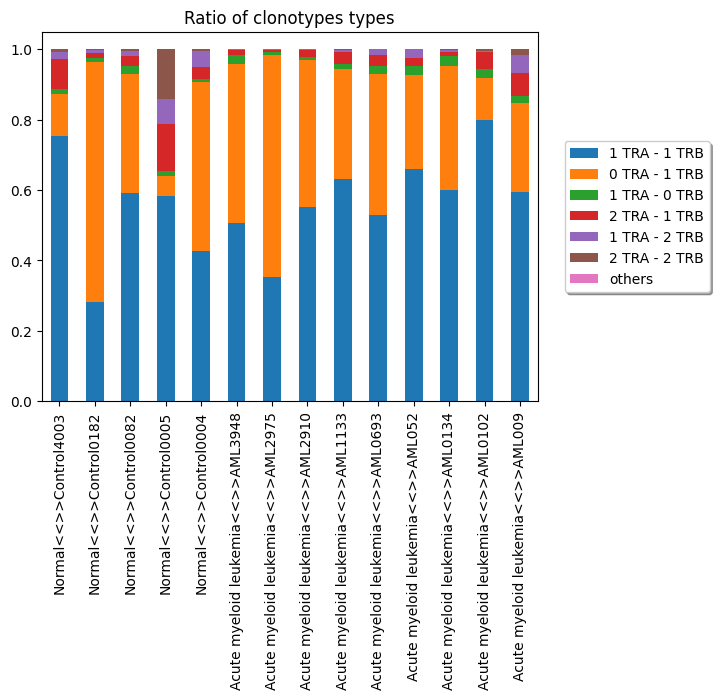

In [45]:
fraction_clo_df, meta_key = create_clonotype_fraction_df(DF, keys=['Condition', 'Subject ID'])
visualize_ratio_clonotype_types(fraction_clo_df, meta_key=meta_key)

## 2. Shannon entropy

### Code 

Currently, I dont know how to calculate clonotype counts from TRA counts and TRB counts, so I just basically fomulate:
```
clonotype_count = min(TRAcount, TRBcount)
```

- Compare Condition: between AML vs control
- Each dot is an entropy values of a Subject ID
- entropy values = f(clonotype ratio within that patient)

In [85]:
def _init_shannon_dct(meta_keys=['Condition']):
    res = {
        'barcode': [],
        'clonotype_id': [],
        'clonotype_count': []
    }
    res.update({
        k: []
        for k in meta_keys
    })
    return res


def _preprocess_shannon_df(VDJ_10X, meta_keys=['Condition']):
    # TODO: optimize running time !!!
    shannon_dct = _init_shannon_dct(meta_keys)

    for bc in VDJ_10X['barcode'].unique():
        tmp_df = VDJ_10X.iloc[
            VDJ_10X['barcode'].values == bc,
            :
        ]
        all_chains = tmp_df['chain'].values
        if ('TRA' not in all_chains or 'TRB' not in all_chains):
            if ('TRD' not in all_chains or 'TRG' not in all_chains):
                continue
        clonotype_id = tmp_df['raw_clonotype_id'].unique()[0]
        clonotype_counts = np.min(tmp_df['umis'].values)
        shannon_dct['barcode'].append(bc)
        shannon_dct['clonotype_id'].append(clonotype_id)
        shannon_dct['clonotype_count'].append(clonotype_counts)

        for k in meta_keys:
            shannon_dct[k].append(tmp_df[k].unique()[0])

    shannon_df = pd.DataFrame(shannon_dct)
    shannon_df = shannon_df.set_index('barcode')
    return shannon_df


def create_shannon_dct(VDJ_10X, meta_keys=['Condition']):
    shannon_df = _preprocess_shannon_df(VDJ_10X, meta_keys)

    new_meta_key = '<<>>'.join(meta_keys)
    if len(meta_keys) == 1:
        print ('Need at least two metadata fields to create shannon box plot')

    if len(meta_keys) > 1:
        shannon_df[new_meta_key] = [
            '<<>>'.join(i)
            for i in shannon_df[meta_keys].values.astype('str')
        ]

    shannon_by_fields = {}
    for k in sorted(shannon_df[new_meta_key].unique()):
        tmp_df = shannon_df.iloc[
            shannon_df[new_meta_key].values == k,
            :
        ]
        tmp_clon, tmp_idx = np.unique(tmp_df['clonotype_id'].values, return_inverse=True)
        tmp_count = tmp_df['clonotype_count'].values
        ratio_arr = np.array([np.sum(tmp_count[tmp_idx == k]) for k in np.unique(tmp_idx)])
        ratio_arr = ratio_arr / np.sum(ratio_arr)

        if k in shannon_by_fields:
            print ('duplicated key: ',  k)

        shannon_by_fields[k] = scipy.stats.entropy(ratio_arr)
    return shannon_by_fields

In [86]:
def _calculate_pvalue_of_shannon(all_data_arr):
    if len(all_data_arr) == 2:
        return scipy.stats.mannwhitneyu(
            all_data_arr[0],
            all_data_arr[1]
        ).pvalue
    else:
        return scipy.stats.f_oneway(
            *all_data_arr
        )


def visualize_shannon_entropy(shannon_condition, group_indices=[], group_names=[]):
    if len(group_indices) == 0 or len(group_names) == 0:
        all_groups = [i.split('<<>>')[0] for i in shannon_condition.keys()]
        group_names, group_indices = np.unique(all_groups, return_inverse=True)

    fig, ax = plt.subplots(nrows=1, ncols=1)
    all_data_arr = []
    for i in range(len(group_names)):
        all_data_arr.append(
            np.array(list(shannon_condition.values()))[group_indices == i]
        )
    shannon_pvalue = _calculate_pvalue_of_shannon(all_data_arr)

    ax.boxplot(all_data_arr)
    for i in range(len(all_data_arr)):
        ax.scatter(x=[i + 1] * len(all_data_arr[i]), y=all_data_arr[i])
    ax.set_xticklabels(group_names)
    ax.set_title("Shannon's entropy")
    plt.text(
        x=len(group_names) / 2 + 0.5,
        y=max(np.array(list(shannon_condition.values()))),
        s='p_value={}'.format(np.round(shannon_pvalue, 5)),
        horizontalalignment='center',
        verticalalignment='top',
    )
    plt.show()

    return

### For plotly

In [91]:
def plotly_shannon_entropy(shannon_condition, meta_key):
	columns = [meta_key[0], 'Entropy per {}'.format(meta_key[1])]
	shannon_condition_df = pd.DataFrame({
		columns[0]: [i.split('<<>>')[0] for i in shannon_condition.keys()],
		columns[1]: shannon_condition.values()
	})
	return shannon_condition_df

In [92]:
shannon_condition = create_shannon_dct(DF, meta_keys=['Condition', 'Subject ID'])
plotly_shannon_condition_df = plotly_shannon_entropy(shannon_condition, ['Condition', 'Subject ID'])
plotly_shannon_condition_df.to_csv('GSE185381_TCR/clonotypes/plotly_data/shannon_df.tsv', sep='\t')
plotly_shannon_condition_df

,Condition,Entropy per Subject ID
0,Acute myeloid leukemia,4.714664
1,Acute myeloid leukemia,5.211786
2,Acute myeloid leukemia,4.447711
3,Acute myeloid leukemia,3.646469
4,Acute myeloid leukemia,4.216257
5,Acute myeloid leukemia,4.786743
6,Acute myeloid leukemia,4.236930
7,Acute myeloid leukemia,4.257306
8,Acute myeloid leukemia,4.466643
9,Normal,6.504520


### Plot with matplotlib

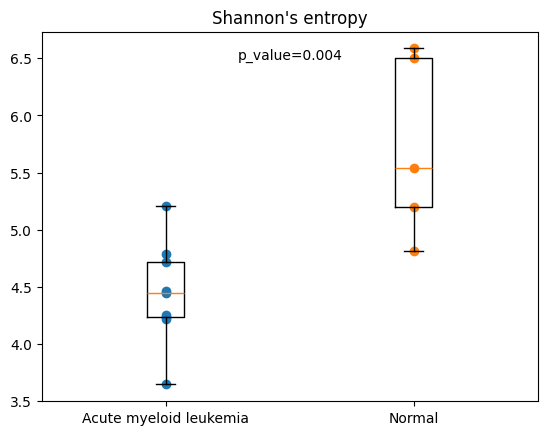

In [96]:
shannon_condition = create_shannon_dct(DF, meta_keys=['Condition', 'Subject ID'])
visualize_shannon_entropy(shannon_condition)

## 3. Clonotype Expansion

### Code

- regarless UMI count of clonotype
- How many T cells express same clonotype in a patient?

In [8]:
def _init_clonotypes_expansion(lower_n=5):
    clono_proportion = {'groups': []}
    clono_proportion.update({
        'n = {}'.format(i): []
        for i in range(1, lower_n + 1)
    })
    clono_proportion['n > {}'.format(lower_n)] = []
    return clono_proportion


def create_clonotypes_expansion_data(VDJ_10X, meta_keys=['Condition'], lower_n=5):
    clono_proportion = _init_clonotypes_expansion(lower_n)

    new_meta_key = '<<>>'.join(meta_keys)
    VDJ_10X[new_meta_key] = [
        '<<>>'.join(i)
        for i in VDJ_10X[meta_keys].values.astype('str')
    ]

    for i in sorted(VDJ_10X[new_meta_key].unique()):
        tmp_df = VDJ_10X.iloc[
            VDJ_10X[new_meta_key].values == i,
            :
        ]
        _, chosen_idx = np.unique(tmp_df['barcode'], return_index=True)
        tmp_df = tmp_df.iloc[
            chosen_idx,
            :
        ]
        clono_arr = tmp_df['raw_clonotype_id'].values

        uni_clo, count_clo = np.unique(clono_arr, return_counts=True)
        clono_proportion['groups'].append(i)

        for n in range(1, lower_n + 1):
            clono_proportion['n = {}'.format(n)].append(
                np.sum(count_clo == n) / count_clo.shape[0]
            )

        clono_proportion['n > {}'.format(lower_n)].append(
            np.sum(count_clo > lower_n) / count_clo.shape[0]
        )

    return clono_proportion

In [9]:
def visualize_clonotypes_expansion(clono_proportion):
    clono_proportion_df = pd.DataFrame(clono_proportion)
    clono_proportion_df = clono_proportion_df.set_index('groups').sort_index(ascending=False)

    ax = clono_proportion_df.plot(
        kind='bar',
        stacked=True,
        title='Clonotype Diversity',
        xlabel=''
    )
    ax.legend(
        loc='center left',
        bbox_to_anchor=(1.04, 0.5),
        fancybox=True,
        shadow=True,
        ncol=1
    )
    plt.show()
    return

### For plotly

In [24]:
def plotly_clonotypes_expansion(clonotypes_expansion_dct):
	clonotypes_expansion_df = pd.DataFrame(clonotypes_expansion_dct)
	clonotypes_expansion_df = clonotypes_expansion_df.set_index('groups')

	reformated_clonotypes_expansion_dct = {
		'Groups': [],
		'Clonotypes size': [],
		'Ratio': []
	}
	for i in clonotypes_expansion_df.index:
		for j in clonotypes_expansion_df.columns:
			reformated_clonotypes_expansion_dct['Groups'].append(i)
			reformated_clonotypes_expansion_dct['Clonotypes size'].append(j)
			reformated_clonotypes_expansion_dct['Ratio'].append(
				clonotypes_expansion_df.loc[i, j]
			)
	reformated_clonotypes_expansion_df = pd.DataFrame(reformated_clonotypes_expansion_dct)
	return reformated_clonotypes_expansion_df

In [25]:
clono_expansion_dct = create_clonotypes_expansion_data(
    DF,
    meta_keys=['Condition', 'Subject ID'],
    lower_n=10,
)

plotly_clonotypes_expansion_df = plotly_clonotypes_expansion(clono_expansion_dct)
plotly_clonotypes_expansion_df.to_csv('GSE185381_TCR/clonotypes/plotly_data/clono_expansion_df.tsv', sep='\t')

### Plot

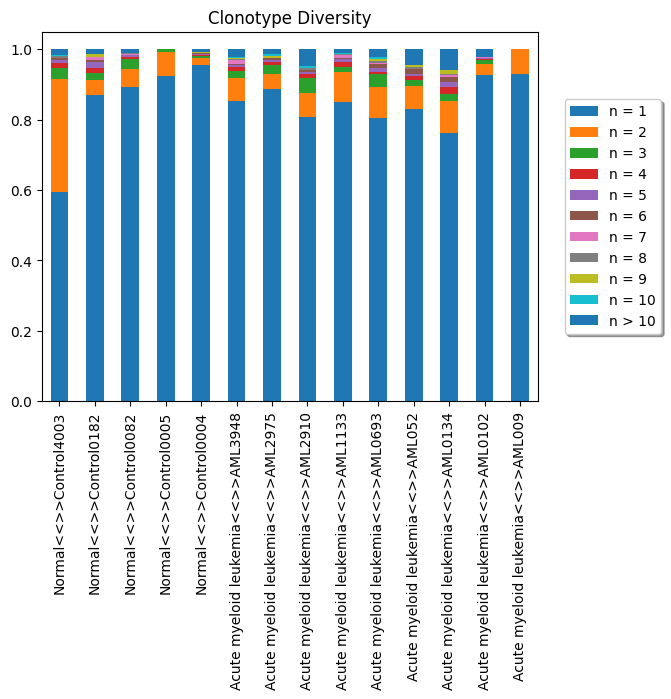

In [18]:
clono_expansion_dct = create_clonotypes_expansion_data(
    DF,
    meta_keys=['Condition', 'Subject ID'],
    lower_n=10,
)
visualize_clonotypes_expansion(clono_expansion_dct)

## 4. cdr3 length

### Code

In [26]:
def _init_cdr3_length_data(meta_key, all_sub_keys, min_len, max_len):
    cdr3chain_proportion_dct = {meta_key: []}
    cdr3chain_proportion_dct.update({
        i: [0] * len(all_sub_keys)
        for i in range(min_len, max_len + 1)
    })
    return cdr3chain_proportion_dct


def _prepare_cdr3_length_data(VDJ_10X, chain='TRB', meta_key='Condition'):
    cdr3chain_df = VDJ_10X[
        ['chain', 'cdr3', meta_key]
    ]
    cdr3chain_df = cdr3chain_df.iloc[
        VDJ_10X['chain'].values == chain,
        :
    ]
    cdr3chain_df['cdr3_length'] = [
        len(cdr3chain_df['cdr3'].values[i])
        for i in range(len(cdr3chain_df))
    ]

    all_sub_keys = sorted(cdr3chain_df[meta_key].unique())

    cdr3chain_proportion_dct = _init_cdr3_length_data(
        meta_key,
        all_sub_keys,
        cdr3chain_df['cdr3_length'].min(),
        cdr3chain_df['cdr3_length'].max()
    )

    return cdr3chain_df, cdr3chain_proportion_dct, all_sub_keys


def create_cdr3_length_data(VDJ_10X, chain='TRB', meta_key='Condition'):
    cdr3chain_df, cdr3chain_proportion_dct, all_sub_keys = _prepare_cdr3_length_data(
        VDJ_10X,
        chain,
        meta_key
    )

    for con_idx in range(len(all_sub_keys)):
        con = all_sub_keys[con_idx]
        tmp_df = cdr3chain_df.iloc[
            cdr3chain_df[meta_key].values == con,
            :
        ]
        all_len = tmp_df['cdr3_length'].values
        x, y = np.unique(all_len, return_counts=True)
        for i in range(len(x)):
            cdr3_len = x[i]
            cdr3_len_count = y[i]
            cdr3chain_proportion_dct[cdr3_len][con_idx] = cdr3_len_count / np.sum(y)

        cdr3chain_proportion_dct[meta_key].append(con)

    return cdr3chain_proportion_dct

In [27]:
def visualize_cdr3_length(cdr3chain_proportion_dct, chain='TRB', meta_key='Condition'):
    cdr3chain_proportion_df = pd.DataFrame(cdr3chain_proportion_dct)
    cdr3chain_proportion_df = cdr3chain_proportion_df.set_index(meta_key)

    bin_edge = np.arange(
        0,
        cdr3chain_proportion_df.columns.max(),
        2
    ).astype('int')

    ax = cdr3chain_proportion_df.T.plot(
        kind='area',
        stacked=False,
        alpha=0.5,
        xticks=bin_edge,
        style='.-'
    )
    ax.set_title('CDR3-{} length'.format(chain))
    ax.grid('on', linestyle='--', axis='x')
    plt.show()

    return

### For plotly

In [32]:
def plotly_cdr3_length(cdr3_length_data):
	cdr3_alpha_length_df = pd.DataFrame(cdr3_length_data)
	meta_name = cdr3_alpha_length_df.columns[0]
	cdr3_alpha_length_df = cdr3_alpha_length_df.set_index(meta_name)

	reformated_cdr3_alpha_length_dct = {
		meta_name: [],
		'CDR3 length': [],
		'Ratio': []
	}
	for i in cdr3_alpha_length_df.index:
		for j in cdr3_alpha_length_df.columns:
			reformated_cdr3_alpha_length_dct['Condition'].append(i)
			reformated_cdr3_alpha_length_dct['CDR3 length'].append(j)
			reformated_cdr3_alpha_length_dct['Ratio'].append(
				cdr3_alpha_length_df.loc[i, j]
			)
	reformated_cdr3_alpha_length_df = pd.DataFrame(reformated_cdr3_alpha_length_dct)
	return reformated_cdr3_alpha_length_df

In [35]:
cdr3_length_data = create_cdr3_length_data(DF, chain='TRA', meta_key='Condition')
reformated_cdr3_alpha_length_df = plotly_cdr3_length(cdr3_length_data)
reformated_cdr3_alpha_length_df.to_csv('GSE185381_TCR/clonotypes/plotly_data/cdr3alpha_length_df.tsv', sep='\t')
reformated_cdr3_alpha_length_df.head()

,Condition,CDR3 length,Ratio
0,Acute myeloid leukemia,5,0.000361
1,Acute myeloid leukemia,6,0.000000
2,Acute myeloid leukemia,7,0.001807
3,Acute myeloid leukemia,8,0.007227
4,Acute myeloid leukemia,9,0.001987


In [36]:
cdr3_length_data = create_cdr3_length_data(DF, chain='TRB', meta_key='Condition')
reformated_cdr3_beta_length_df = plotly_cdr3_length(cdr3_length_data)
reformated_cdr3_beta_length_df.to_csv('GSE185381_TCR/clonotypes/plotly_data/cdr3beta_length_df.tsv', sep='\t')
reformated_cdr3_beta_length_df.head()

,Condition,CDR3 length,Ratio
0,Acute myeloid leukemia,7,0.000484
1,Acute myeloid leukemia,8,0.000121
2,Acute myeloid leukemia,9,0.000242
3,Acute myeloid leukemia,10,0.007992
4,Acute myeloid leukemia,11,0.019133


### Plot

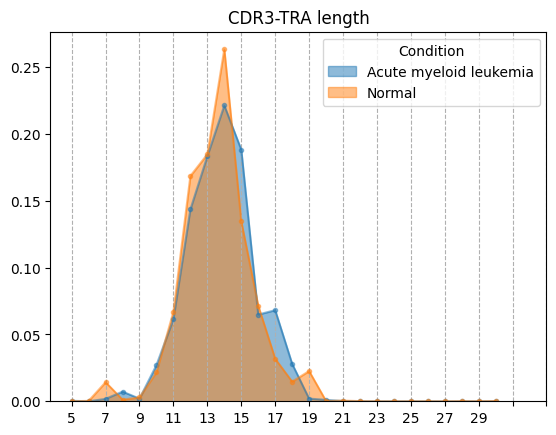

In [37]:
cdr3_length_data = create_cdr3_length_data(DF, chain='TRA', meta_key='Condition')
visualize_cdr3_length(cdr3_length_data, 'TRA', 'Condition')

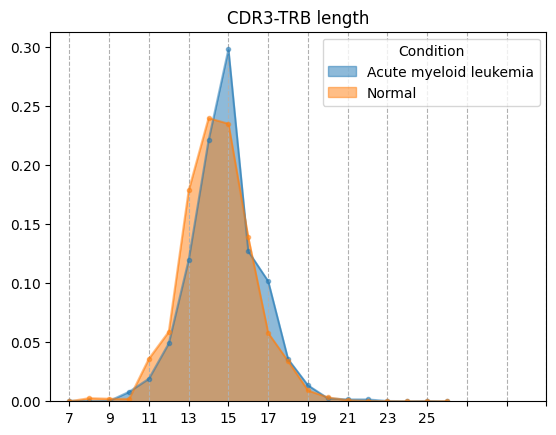

In [38]:
cdr3_length_data = create_cdr3_length_data(DF, chain='TRB', meta_key='Condition')
visualize_cdr3_length(cdr3_length_data, 'TRB', 'Condition')

## 5. Clonal diversity on UMAP

### Code

In [413]:
DF['barcode'].unique()

array(['X2020.05.22.5prime_1.AAACCTGGTCGAAAGC',
       'X2020.05.22.5prime_1.AAAGCAACATTTGCCC',
       'X2020.05.22.5prime_1.AACCATGGTGAGGCTA', ...,
       'X2021.04.29.0134_cDNA.TTTGGTTCAGTATAAG',
       'X2021.04.29.0134_cDNA.TTTGTCACAAGAGGCT',
       'X2021.04.29.0134_cDNA.TTTGTCACAATGCCAT'], dtype=object)

In [414]:
filtered_adata = adata.copy()
filtered_adata.obs['chosen_cells'] = False
filtered_adata.obs.loc[
    DF['barcode'].unique(),
    'chosen_cells'
] = True
filtered_adata = filtered_adata[
    filtered_adata.obs['chosen_cells'].values,
    :
]

In [415]:
filtered_adata

View of AnnData object with n_obs × n_vars = 24118 × 22580
    obs: 'Number of mRNA transcripts', 'Number of genes', 'Percentage of mitochondrial genes', 'Orig ident', 'CloneType', 'CloneType quantity', 'Sample run', 'Sample ID', 'Subject ID', 'Condition', 'Tissue', 'Gender', 'Storage technique', "Author's cell type", 'Cell source', 'Sequencing platform', 'Quantification', 'Age', 'Dx', 'DxELN Cytogenetic', 'Cytogenetics', 'FAB', 'BM Blasts', 'BMT in CR1', 'Risk', 'Reason', 'Age group', 'Sampling technique', 'Sampling site', 'Genome', 'Cell sorting', 'chosen_cells'
    obsm: 'X_harmony_(sample_id)', 'X_pca', 'X_pca_(no_batch_corrected)', 'X_tsne', 'X_tsne_(perplexity=30)', 'X_umap'

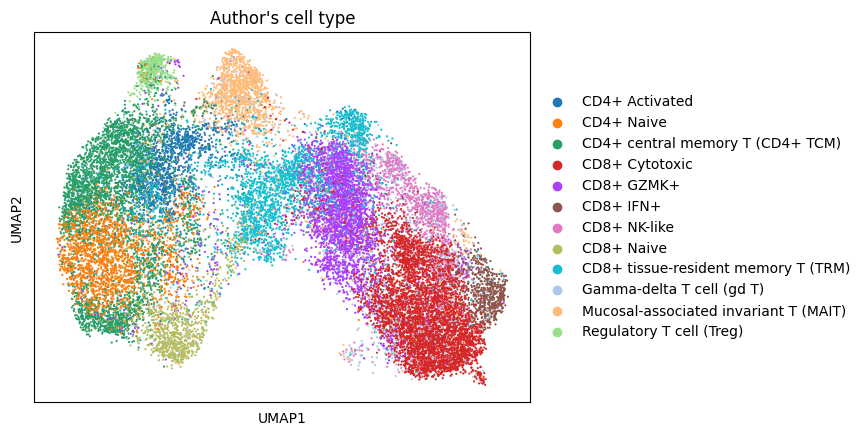

In [420]:
scanpy.pl.umap(filtered_adata, color=["Author's cell type"], s=10)

In [424]:
simplified_celltypes = {
    'CD4+ Naive': 'naive / central memory T cells',
    'CD4+ Activated': 'naive / central memory T cells',
    'CD4+ central memory T (CD4+ TCM)': 'naive / central memory T cells',
    'CD8+ Naive': 'naive / central memory T cells',
    'Regulatory T cell (Treg)': 'naive / central memory T cells',
    'Mucosal-associated invariant T (MAIT)': 'transitional T cells',
    'CD8+ tissue-resident memory T (TRM)': 'transitional T cells',
    'CD8+ Cytotoxic': 'terminal effector T cells',
    'CD8+ GZMK+': 'terminal effector T cells',
    'CD8+ IFN+': 'terminal effector T cells',
    'CD8+ NK-like': 'terminal effector T cells',
    'Gamma-delta T cell (gd T)': 'terminal effector T cells',
}

In [428]:
filtered_adata.obs['simplified_celltype'] = [simplified_celltypes[i] for i in filtered_adata.obs["Author's cell type"]]

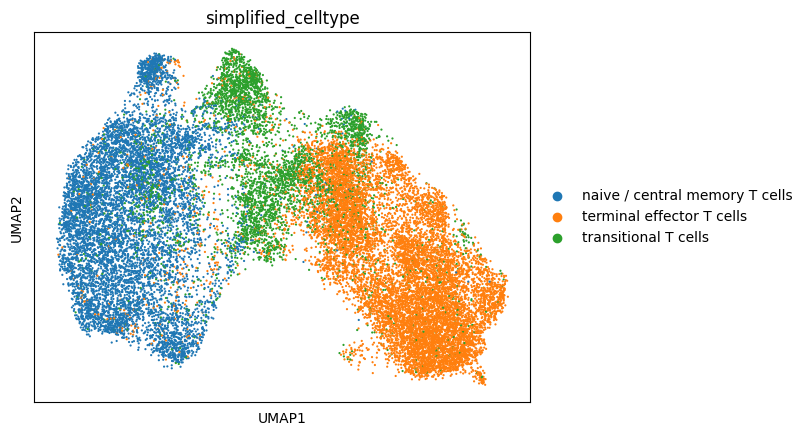

In [445]:
fig, ax = plt.subplots(nrows=1, ncols=1)
scanpy.pl.umap(filtered_adata, color=["simplified_celltype"], s=10, ax=ax)
plt.show()

In [447]:
x_min = filtered_adata.obsm['X_umap'][:, 0].min()
x_max = filtered_adata.obsm['X_umap'][:, 0].max()
y_min = filtered_adata.obsm['X_umap'][:, 1].min()
y_max = filtered_adata.obsm['X_umap'][:, 1].max()

In [467]:
print (x_min, x_max)
print (y_min, y_max)

-7.844206 8.578037
-4.107633 5.1095986


In [452]:
## x:y = 16 : 8

In [603]:
y_chunks = np.histogram(
    filtered_adata.obsm['X_umap'][:, 1],
    bins=20
)[1]
x_chunks = np.histogram(
    filtered_adata.obsm['X_umap'][:, 0],
    bins=40
)[1]

In [604]:
UMAP_condition_composition = np.zeros(shape=(20, 40, 3), dtype=np.float32)

In [605]:
pos_dct = {'Normal': 0, 'Acute myeloid leukemia': 1}
for i in range(y_chunks.shape[0] - 1):
    for j in range(x_chunks.shape[0] - 1):
        start_y, end_y = y_chunks[i], y_chunks[i+1]
        start_x, end_x = x_chunks[j], x_chunks[j+1]
        chosen_barcodes = np.sum(
            [
                (filtered_adata.obsm['X_umap'][:, 1] >= start_y).astype('int'),
                (filtered_adata.obsm['X_umap'][:, 1] <= end_y).astype('int'),
                (filtered_adata.obsm['X_umap'][:, 0] >= start_x).astype('int'),
                (filtered_adata.obsm['X_umap'][:, 0] <= end_x).astype('int')
            ], axis=0
        ) == 4
        condition_arr = filtered_adata.obs.iloc[chosen_barcodes, :]['Condition'].values

        if not condition_arr:
            continue

        con, cou = np.unique(condition_arr, return_counts=True)
        cou = cou / np.sum(cou)
        for k in range(len(con)):
            UMAP_condition_composition[i, j, pos_dct[con[k]]] = cou[k]

        UMAP_condition_composition[i, j, 2] = len(condition_arr)

In [606]:
UMAP_condition_composition_dct = {
    'X': [],
    'Y': [],
    'composition': [],
    'n_cells': []
}
for i in range(y_chunks.shape[0] - 1):
    for j in range(x_chunks.shape[0] - 1):
        compo = UMAP_condition_composition[i, j, :2]
        if np.all(compo == np.array([0,0])):
            continue

        center_y = y_chunks[i] + (y_chunks[i+1] - y_chunks[i]) / 2
        center_x = x_chunks[j] + (x_chunks[j+1] - x_chunks[j]) / 2
        UMAP_condition_composition_dct['X'].append(center_x)
        UMAP_condition_composition_dct['Y'].append(center_y)
        UMAP_condition_composition_dct['composition'].append(compo)
        UMAP_condition_composition_dct['n_cells'].append(UMAP_condition_composition[i, j, 2])

In [413]:
DF['barcode'].unique()

array(['X2020.05.22.5prime_1.AAACCTGGTCGAAAGC',
       'X2020.05.22.5prime_1.AAAGCAACATTTGCCC',
       'X2020.05.22.5prime_1.AACCATGGTGAGGCTA', ...,
       'X2021.04.29.0134_cDNA.TTTGGTTCAGTATAAG',
       'X2021.04.29.0134_cDNA.TTTGTCACAAGAGGCT',
       'X2021.04.29.0134_cDNA.TTTGTCACAATGCCAT'], dtype=object)

In [414]:
filtered_adata = adata.copy()
filtered_adata.obs['chosen_cells'] = False
filtered_adata.obs.loc[
    DF['barcode'].unique(),
    'chosen_cells'
] = True
filtered_adata = filtered_adata[
    filtered_adata.obs['chosen_cells'].values,
    :
]

In [415]:
filtered_adata

View of AnnData object with n_obs × n_vars = 24118 × 22580
    obs: 'Number of mRNA transcripts', 'Number of genes', 'Percentage of mitochondrial genes', 'Orig ident', 'CloneType', 'CloneType quantity', 'Sample run', 'Sample ID', 'Subject ID', 'Condition', 'Tissue', 'Gender', 'Storage technique', "Author's cell type", 'Cell source', 'Sequencing platform', 'Quantification', 'Age', 'Dx', 'DxELN Cytogenetic', 'Cytogenetics', 'FAB', 'BM Blasts', 'BMT in CR1', 'Risk', 'Reason', 'Age group', 'Sampling technique', 'Sampling site', 'Genome', 'Cell sorting', 'chosen_cells'
    obsm: 'X_harmony_(sample_id)', 'X_pca', 'X_pca_(no_batch_corrected)', 'X_tsne', 'X_tsne_(perplexity=30)', 'X_umap'

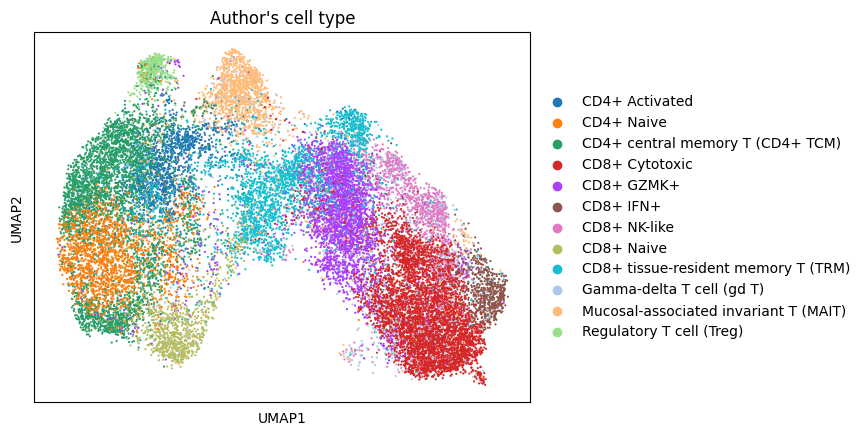

In [420]:
scanpy.pl.umap(filtered_adata, color=["Author's cell type"], s=10)

In [424]:
simplified_celltypes = {
    'CD4+ Naive': 'naive / central memory T cells',
    'CD4+ Activated': 'naive / central memory T cells',
    'CD4+ central memory T (CD4+ TCM)': 'naive / central memory T cells',
    'CD8+ Naive': 'naive / central memory T cells',
    'Regulatory T cell (Treg)': 'naive / central memory T cells',
    'Mucosal-associated invariant T (MAIT)': 'transitional T cells',
    'CD8+ tissue-resident memory T (TRM)': 'transitional T cells',
    'CD8+ Cytotoxic': 'terminal effector T cells',
    'CD8+ GZMK+': 'terminal effector T cells',
    'CD8+ IFN+': 'terminal effector T cells',
    'CD8+ NK-like': 'terminal effector T cells',
    'Gamma-delta T cell (gd T)': 'terminal effector T cells',
}

In [428]:
filtered_adata.obs['simplified_celltype'] = [simplified_celltypes[i] for i in filtered_adata.obs["Author's cell type"]]

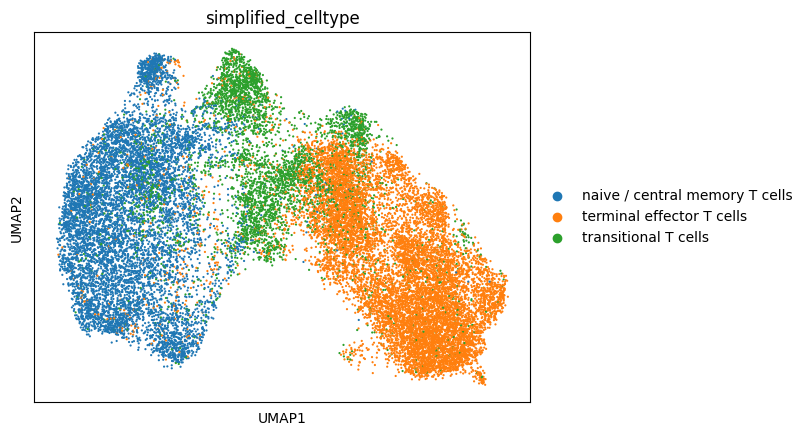

In [445]:
fig, ax = plt.subplots(nrows=1, ncols=1)
scanpy.pl.umap(filtered_adata, color=["simplified_celltype"], s=10, ax=ax)
plt.show()

In [447]:
x_min = filtered_adata.obsm['X_umap'][:, 0].min()
x_max = filtered_adata.obsm['X_umap'][:, 0].max()
y_min = filtered_adata.obsm['X_umap'][:, 1].min()
y_max = filtered_adata.obsm['X_umap'][:, 1].max()

In [467]:
print (x_min, x_max)
print (y_min, y_max)

-7.844206 8.578037
-4.107633 5.1095986


In [452]:
## x:y = 16 : 8

In [603]:
y_chunks = np.histogram(
    filtered_adata.obsm['X_umap'][:, 1],
    bins=20
)[1]
x_chunks = np.histogram(
    filtered_adata.obsm['X_umap'][:, 0],
    bins=40
)[1]

In [604]:
UMAP_condition_composition = np.zeros(shape=(20, 40, 3), dtype=np.float32)

In [605]:
pos_dct = {'Normal': 0, 'Acute myeloid leukemia': 1}
for i in range(y_chunks.shape[0] - 1):
    for j in range(x_chunks.shape[0] - 1):
        start_y, end_y = y_chunks[i], y_chunks[i+1]
        start_x, end_x = x_chunks[j], x_chunks[j+1]
        chosen_barcodes = np.sum(
            [
                (filtered_adata.obsm['X_umap'][:, 1] >= start_y).astype('int'),
                (filtered_adata.obsm['X_umap'][:, 1] <= end_y).astype('int'),
                (filtered_adata.obsm['X_umap'][:, 0] >= start_x).astype('int'),
                (filtered_adata.obsm['X_umap'][:, 0] <= end_x).astype('int')
            ], axis=0
        ) == 4
        condition_arr = filtered_adata.obs.iloc[chosen_barcodes, :]['Condition'].values

        if not condition_arr:
            continue

        con, cou = np.unique(condition_arr, return_counts=True)
        cou = cou / np.sum(cou)
        for k in range(len(con)):
            UMAP_condition_composition[i, j, pos_dct[con[k]]] = cou[k]

        UMAP_condition_composition[i, j, 2] = len(condition_arr)

In [606]:
UMAP_condition_composition_dct = {
    'X': [],
    'Y': [],
    'composition': [],
    'n_cells': []
}
for i in range(y_chunks.shape[0] - 1):
    for j in range(x_chunks.shape[0] - 1):
        compo = UMAP_condition_composition[i, j, :2]
        if np.all(compo == np.array([0,0])):
            continue

        center_y = y_chunks[i] + (y_chunks[i+1] - y_chunks[i]) / 2
        center_x = x_chunks[j] + (x_chunks[j+1] - x_chunks[j]) / 2
        UMAP_condition_composition_dct['X'].append(center_x)
        UMAP_condition_composition_dct['Y'].append(center_y)
        UMAP_condition_composition_dct['composition'].append(compo)
        UMAP_condition_composition_dct['n_cells'].append(UMAP_condition_composition[i, j, 2])

### Plot

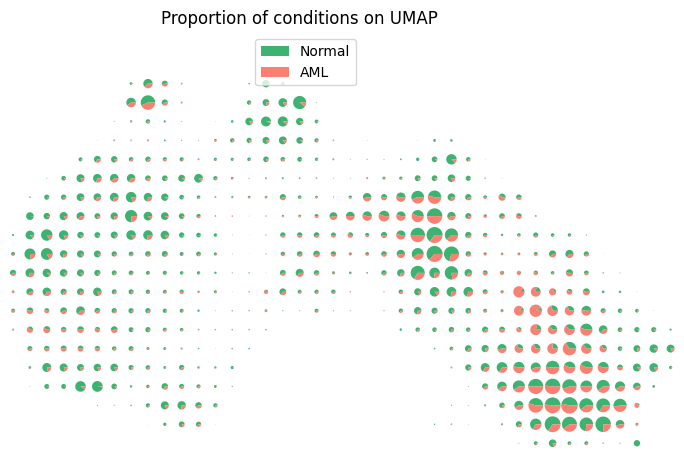

In [616]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
x = UMAP_condition_composition_dct['X']
y = UMAP_condition_composition_dct['Y']
pie_data = UMAP_condition_composition_dct['composition']
n_cells = UMAP_condition_composition_dct['n_cells']

# Create scatter plot
fig, ax = plt.subplots(figsize=(2, 4/3))

# Overlay pie charts
# ax[0].scatter(x, y)
size = 0.2  # Control the size of the pie charts
all_pie_radius = size * np.array(n_cells) / np.max(n_cells)
for (i, j, data, pie_radius) in zip(x, y, pie_data, all_pie_radius):
    ax.pie(
        data,
        center=(i, j),
        radius=pie_radius,
        colors=['mediumseagreen', 'salmon']
    )

ax.set_title('Proportion of conditions on UMAP')
plt.legend(['Normal', 'AML'])
plt.show()

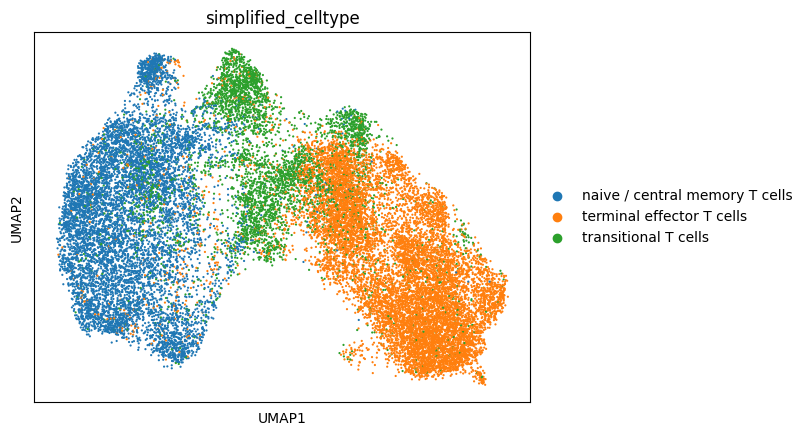

In [598]:
scanpy.pl.umap(filtered_adata, color=["simplified_celltype"], s=10)

## 6. Clonotypes tracing across conditions/patients

### Code

In [20]:
def _find_common_clonotypes_sequence(VDJ_10X, subject_key, n_cdr3=5):
	original_arr = np.array([])
	for i in np.unique(VDJ_10X[subject_key].values):
		tmp_df = VDJ_10X.iloc[
			VDJ_10X[subject_key].values == i,
			:
		]
		original_arr = np.concatenate(
			[original_arr, np.unique(tmp_df['cdr3'].values)]
		)
	cdr3_seq, cdr3_counts = np.unique(original_arr, return_counts=True)
	return cdr3_seq[np.argsort(cdr3_counts)[::-1]][:n_cdr3]


def clonotype_tracing(VDJ_10X, meta_keys=['Condition']):
	new_meta_key = '<<>>'.join(meta_keys)
	VDJ_10X[new_meta_key] = [
		'<<>>'.join(i)
		for i in VDJ_10X[meta_keys].values.astype('str')
	]
	chosen_cdr3_seq = _find_common_clonotypes_sequence(VDJ_10X, new_meta_key)
	all_groups = np.unique(VDJ_10X[new_meta_key].values)
	clonotype_tracing_dct = {'Groups': all_groups}
	for cdr3_seq in chosen_cdr3_seq:
		tmp_ratio = []
		for gr in all_groups:
			tmp_df = VDJ_10X.iloc[
				VDJ_10X[new_meta_key].values == gr,
				:
			]
			tmp_cdr3_seq_arr = tmp_df['cdr3'].values
			tmp_ratio.append(
				np.sum(tmp_cdr3_seq_arr == cdr3_seq) / tmp_cdr3_seq_arr.shape[0]
			)
		clonotype_tracing_dct[cdr3_seq] = tmp_ratio
	return clonotype_tracing_dct

In [21]:
def visualize_clonotype_tracing(clonotype_tracing_dct):
	df = pd.DataFrame(clonotype_tracing_dct)
	df = df.set_index('Groups')
	fig, ax = plt.subplots(1, facecolor='white')
	df.plot(kind='bar', stacked=True, ax=ax)
	return

### For Plotly

In [ ]:
def plotly_clonotype_tracing(clonotype_tracing_dct):
	clonotypes_expansion_df = pd.DataFrame(clonotype_tracing_dct)
	clonotypes_expansion_df = clonotypes_expansion_df.set_index('Groups')

	reformated_clonotype_tracing_dct = {
		'Groups': [],
		'Clonotypes': [],
		'Ratio': []
	}
	for i in clonotypes_expansion_df.index:
		for j in clonotypes_expansion_df.columns:
			reformated_clonotype_tracing_dct['Groups'].append(i)
			reformated_clonotype_tracing_dct['Clonotypes'].append(i)
			reformated_clonotype_tracing_dct['Ratio'].append(
				clonotypes_expansion_df.loc[i, j]
			)
	reformated_clonotype_tracing_df = pd.DataFrame(reformated_clonotype_tracing_dct)
	return reformated_clonotype_tracing_df

### Plot

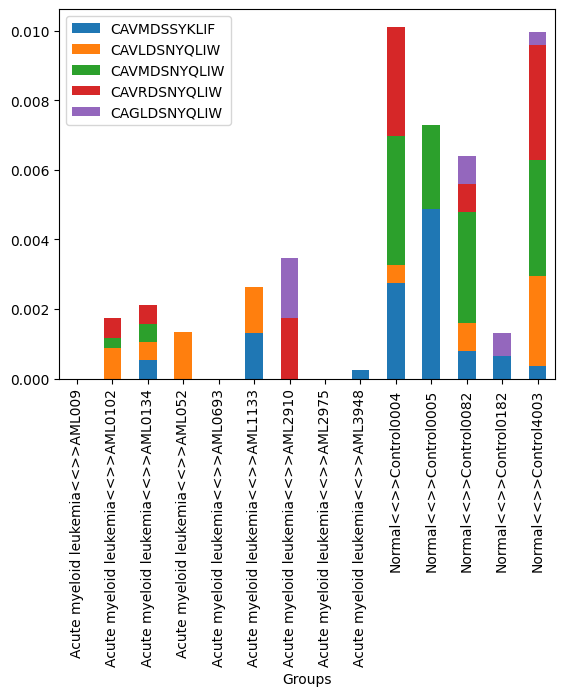

In [19]:
clonotype_tracing_dct = clonotype_tracing(DF, ['Condition', 'Subject ID'])
visualize_clonotype_tracing(clonotype_tracing_dct)

## Plotly and Dash

We will use all the plotly dataframe created above to build an interactive charts report

[python script](./html_plot.py)